In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-billionaires-2021-30/forbes_billionaires_geo.csv


In [2]:
forbes_data= pd.read_csv('../input/forbes-billionaires-2021-30/forbes_billionaires_geo.csv')
forbes_data.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


In [3]:
forbes_data.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
geometry          0
dtype: int64

In [4]:
forbes_data['Country'].value_counts()[:20]

United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Japan              49
Taiwan             47
Australia          44
South Korea        43
France             42
Sweden             41
Switzerland        40
Thailand           31
Spain              30
Turkey             27
Name: Country, dtype: int64

Text(0, 0.5, 'Number of Billionaires')

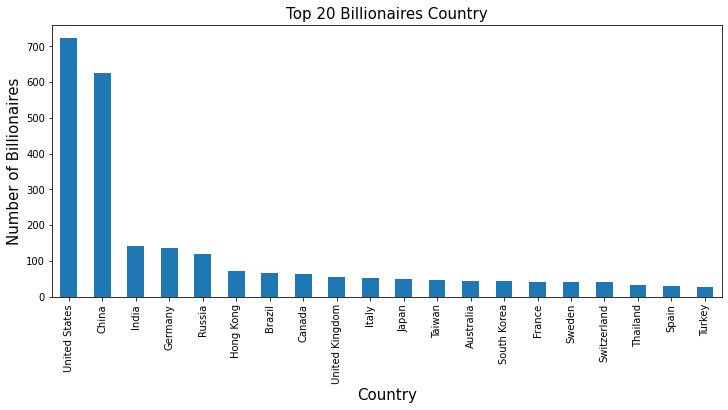

In [5]:
plt.figure(figsize=(12,5))
country_data= forbes_data['Country'].value_counts()[:20]
country_data.plot.bar()
plt.title('Top 20 Billionaires Country', fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of Billionaires",fontsize=15)

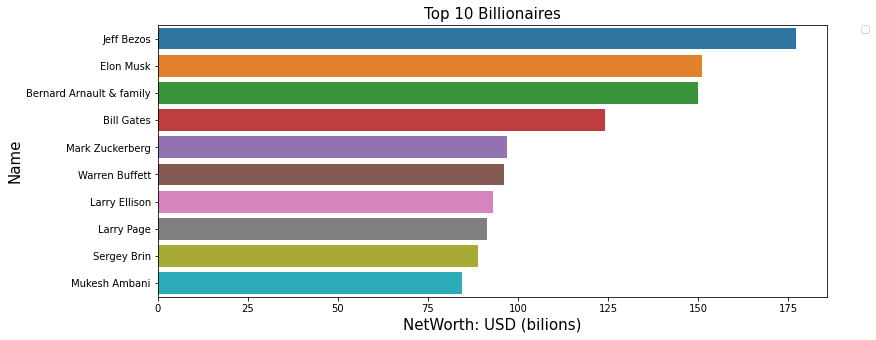

In [6]:
plt.figure(figsize=(12,5))
sns.barplot(y="Name", x="NetWorth", data=forbes_data[:10])
plt.title('Top 10 Billionaires', fontsize=15)
plt.xlabel("NetWorth: USD (bilions)",fontsize=15)
plt.ylabel("Name",fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Self Made Rate')

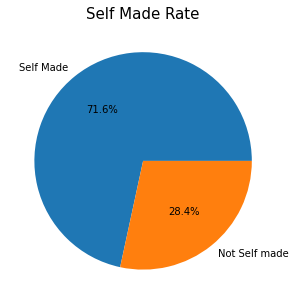

In [7]:
Self_made_status= len(forbes_data[forbes_data['Self_made']==True])
Not_Self_made_status=len(forbes_data[forbes_data['Self_made']==False])
plt.figure(figsize=(12,5))
Self_made_pie = [Self_made_status,Not_Self_made_status]
labels = 'Self Made','Not Self made'
plt.pie(Self_made_pie,labels=labels,autopct='%1.1f%%')
plt.title('Self Made Rate',fontsize=15)

In [8]:
forbes_data['Status'].unique()

array(['In Relationship', 'Married', 'Divorced', 'Widowed, Remarried',
       nan, 'Widowed', 'Single', 'Separated', 'Engaged'], dtype=object)

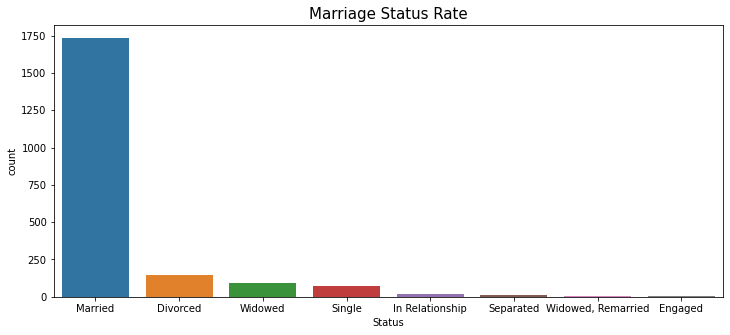

([<matplotlib.patches.Wedge at 0x7f9037a76190>,
 [Text(1.0994520103525394, 0.03471709855042479, 'In Relationship'),
  Text(-0.9797315577912132, 0.5001260587771874, 'Married'),
  Text(0.7737145441304074, -0.7818988452485884, 'Divorced'),
  Text(0.930704743813112, -0.5863349553316515, 'Widowed, Remarried'),
  Text(1.0099891763863875, -0.435800256519368, 'Widowed'),
  Text(1.0870961421590777, -0.1679939811506663, 'Single'),
  Text(1.0995973847812053, -0.02975888745121721, 'Separated'),
  Text(1.0999801163198648, -0.006613902096102234, 'Engaged')],
 [Text(0.5997010965559305, 0.018936599209322613, '1.0%'),
  Text(-0.5343990315224799, 0.27279603206028397, '83.0%'),
  Text(0.4220261149802222, -0.4264902792265028, '6.9%'),
  Text(0.5076571329889701, -0.3198190665445371, '0.4%'),
  Text(0.5509031871198476, -0.23770923082874612, '4.5%'),
  Text(0.5929615320867696, -0.09163308062763616, '3.5%'),
  Text(0.5997803916988391, -0.016232120427936658, '0.5%'),
  Text(0.5999891543562899, -0.0036075829615

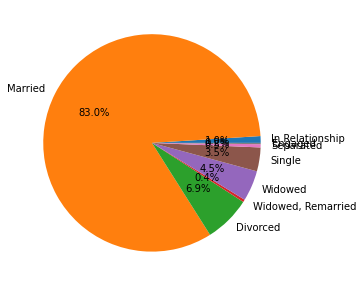

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(forbes_data['Status'],order = forbes_data['Status'].value_counts().index)
plt.title('Marriage Status Rate',fontsize=15)
plt.show()

plt.figure(figsize=(12,5))
status_data=[]
for i in range(len(forbes_data['Status'].unique())):
    if i == 4:
        continue
    status_data.append(len(forbes_data[forbes_data['Status']==forbes_data['Status'].unique()[i]]))
labels = 'In Relationship', 'Married', 'Divorced', 'Widowed, Remarried','Widowed', 'Single', 'Separated', 'Engaged'
plt.pie(status_data,labels=labels,autopct='%1.1f%%')

In [10]:
forbes_data= forbes_data.dropna(subset=['Age'])
def Age(age):
    if age >= 90 : return '90 years old'
    if age >= 80 : return '80 years old'
    if age >= 70 : return '70 years old'
    if age >= 60 : return '60 years old'
    if age >= 50 : return '50 years old'
    if age >= 40 : return '40 years old'
    if age >= 30 : return '30 years old'
    if age >= 20 : return '20 years old'
    else: return 'Teenager'
forbes_data['age_group'] = forbes_data.apply(lambda x: Age(x["Age"]), axis = 1)

Text(0.5, 0, 'Age')

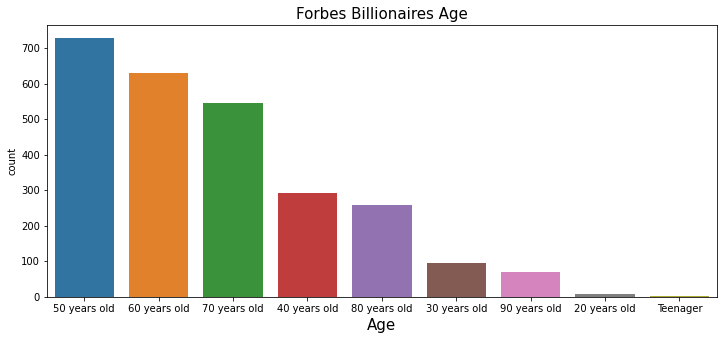

In [11]:
plt.figure(figsize=(12,5))
g = sns.countplot(forbes_data['age_group'],order = forbes_data['age_group'].value_counts().index)
plt.title('Forbes Billionaires Age',fontsize=15)
plt.xlabel("Age", fontsize=15)

Text(0.5, 0, 'Number of Children')

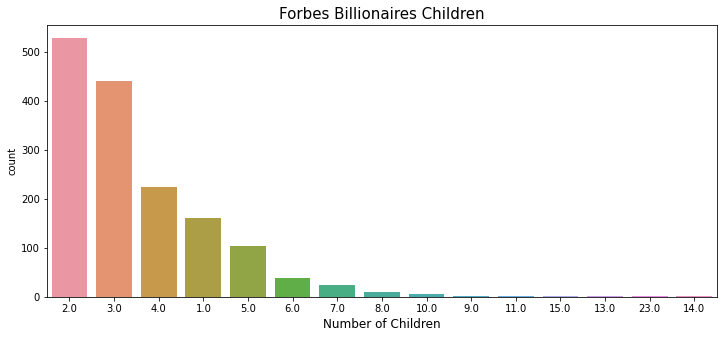

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(forbes_data['Children'],order = forbes_data['Children'].value_counts().index)
plt.title('Forbes Billionaires Children',fontsize=15)
plt.xlabel("Number of Children", fontsize=12)

In [13]:
forbes_data['Education'].unique()

array(['Bachelor of Arts/Science, Princeton University',
       'Bachelor of Arts/Science, University of Pennsylvania',
       'Bachelor of Arts/Science, Ecole Polytechnique de Paris', ...,
       'National Taichung University of Education', 'High School',
       'Bachelor of Science, University of Florida'], dtype=object)

In [14]:
import re
dropout_highschool = forbes_data.Education.str.contains('Drop Out, High School', flags = re.IGNORECASE, regex = True, na = False)
university= forbes_data.Education.str.contains('University', flags = re.IGNORECASE, regex = True, na = False)
baschelor_science= forbes_data.Education.str.contains('Bachelor of Science', flags = re.IGNORECASE, regex = True, na = False)
baschelor_art_science= forbes_data.Education.str.contains('Bachelor of Arts/Science', flags = re.IGNORECASE, regex = True, na = False)
Master_of= forbes_data.Education.str.contains('Master of', flags = re.IGNORECASE, regex = True, na = False)
dropout = forbes_data.Education.str.contains('Drop Out', flags = re.IGNORECASE, regex = True, na = False)

print("Drop out High School: "+ str(len(forbes_data[dropout_highschool]['Education'])))
print("Drop out: "+ str(len(forbes_data[dropout]['Education'])))
print("University: "+ str(len(forbes_data[university]['Education'])-len(forbes_data[dropout]['Education'])))
print("University with baschelor_science: "+ str(len(forbes_data[baschelor_science]['Education'])))
print("University with Art/science: "+ str(len(forbes_data[baschelor_art_science]['Education'])))
print("Master: "+ str(len(forbes_data[Master_of]['Education'])))

Drop out High School: 8
Drop out: 78
University: 991
University with baschelor_science: 106
University with Art/science: 794
Master: 438


Text(0.5, 1.0, 'Forbes Billionaires Education')

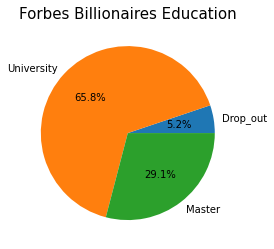

In [15]:
Drop_out = len(forbes_data[dropout]['Education'])
University = len(forbes_data[university]['Education'])-len(forbes_data[dropout]['Education'])
Master = len(forbes_data[Master_of]['Education'])
Education = [Drop_out, University, Master]

labels = 'Drop_out','University', 'Master'
plt.pie(Education,labels=labels,autopct='%1.1f%%')
plt.title('Forbes Billionaires Education',fontsize=15)

Throughout Top 10 billionaries, there are 4 drop out university from Harvard, Stanford, University of Chicago

In [16]:
top_10_billionaires = forbes_data[:10]
print("Drop out: "+ str(len(top_10_billionaires[dropout]['Education'])))
print(top_10_billionaires[dropout]['Education'])

Drop out: 4
3                         Drop Out, Harvard University
4                         Drop Out, Harvard University
6    Drop Out, University of Chicago; Drop Out, Uni...
9    Drop Out, Stanford University; Bachelor of Sci...
Name: Education, dtype: object
